### Zhiyuan Liu's Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

# Problem 1: Setting up the data and Linear Classifier

In [5]:
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None) 
Y = np.genfromtxt('data/Y_train.txt', delimiter=None) 
X,Y = ml.shuffleData(X,Y)

print(X.shape)
print(Y.shape)

(200000, 14)
(200000,)


## Q1

In [8]:
print('min = ', np.min(X, axis = 0))
print('max = ', np.max(X, axis = 0))
print('mean = ', np.mean(X, axis = 0))
print('var = ', np.var(X, axis = 0))

min =  [ 1.9350e+02  1.5250e+02  2.1425e+02  1.5250e+02  1.0000e+01  0.0000e+00
  0.0000e+00  0.0000e+00  8.7589e-01  0.0000e+00  0.0000e+00  0.0000e+00
  9.9049e-01 -9.9990e+02]
max =  [2.5300e+02 2.4900e+02 2.5250e+02 2.5250e+02 3.1048e+04 1.3630e+04
 9.2380e+03 1.2517e+02 1.9167e+01 1.3230e+01 6.6761e+01 7.3902e+01
 9.7504e+02 7.9720e+02]
mean =  [2.41601104e+02 2.27376571e+02 2.41554150e+02 2.32826768e+02
 3.08992337e+03 9.28259020e+02 1.38093830e+02 3.24857933e+00
 6.49865290e+00 2.09713912e+00 4.21766041e+00 2.69171845e+00
 1.02715905e+01 5.78148050e+00]
var =  [8.34991711e+01 9.26255931e+01 3.52863398e+01 9.76257317e+01
 1.56515138e+07 3.08176182e+06 4.43951746e+05 8.21948502e+00
 6.40504819e+00 4.36344047e+00 4.08637188e+00 2.19877847e+00
 4.04646245e+02 3.40652055e+03]


## Q2

In [23]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt) # Normalize the features 
XvS, _ = ml.rescale(Xva, params) # Normalize the features

print(Xtr.shape)
print(Yva.shape)
print(XtS.shape)
print(XvS.shape)


(160000, 14)
(40000,)
(5000, 14)
(40000, 14)


In [20]:
print('Training:')
print('min = ', np.min(XtS, axis = 0))
print('max = ', np.max(XtS, axis = 0))
print('mean = ', np.mean(XtS, axis = 0))
print('var = ', np.var(XtS, axis = 0))

Training:
min =  [ -4.44388405  -3.97613598  -4.50170696  -2.82054574  -0.79098017
  -0.52341183  -0.198389    -1.13489794  -2.11086267  -0.99993405
  -2.12660763  -1.89052581  -0.47756894 -16.92686545]
max =  [ 1.25457608  1.78066768  1.77730571  1.95354925  7.36935003  7.61180462
 13.74708956  8.91028803  4.27660806  4.52186562  6.98719275 13.47745335
 49.48790281 12.52637108]
mean =  [-3.20894422e-15  2.51438870e-15 -5.42410783e-14 -2.71676903e-14
 -6.75903777e-17  1.39488421e-16 -3.14159809e-16 -4.05797618e-16
 -9.99333949e-16  7.18980431e-16 -8.49142978e-16 -3.18949311e-15
  1.15223386e-15  4.02078371e-16]
var =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
print('Validation:')
print('min = ', np.min(XvS, axis = 0))
print('max = ', np.max(XvS, axis = 0))
print('mean = ', np.mean(XvS, axis = 0))
print('var = ', np.var(XvS, axis = 0))

Validation:
min =  [ -5.32908174  -3.97613598  -4.55792167  -2.92268726  -0.7912431
  -0.52341183  -0.198389    -1.13489794  -2.22290153  -0.99993405
  -2.12660763  -1.89052581  -0.47939007 -16.92686545]
max =  [ 1.25457608  2.25600009  1.83522389  1.98827737  7.36935003  7.61180462
 13.74708956  8.91028803  4.78082507  5.4896644  13.55449008 38.16432873
 49.48790281 13.17796901]
mean =  [-0.01046472 -0.03135781 -0.03678486 -0.02251483  0.01750273  0.03520212
  0.01888531 -0.00737174  0.03571879  0.03331622  0.03494385  0.04670989
 -0.00817653  0.00486745]
var =  [1.03312196 1.05095611 1.04891268 1.02666459 1.08238603 1.1212983
 1.06447592 0.96514949 1.04667444 1.0686109  1.07520744 1.25634665
 0.92717743 1.00017888]


## Q3

In [32]:
reg_value = np.linspace(0,8,10)

training_auc = np.zeros(10)
validation_auc = np.zeros(10)

for i, r in enumerate(reg_value):
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100) 
    training_auc[i] = learner.auc(XtS, Yt) # train AUC
    validation_auc[i] = learner.auc(XvS, Yva)
    
print(training_auc)
print(validation_auc)



[0.66151794 0.61708233 0.60264192 0.59046973 0.58310286 0.50953539
 0.50953539 0.50953539 0.50953539 0.50953539]
[0.65146811 0.60312207 0.58513866 0.57224215 0.56496986 0.49933836
 0.49933836 0.49933836 0.49933836 0.49933836]


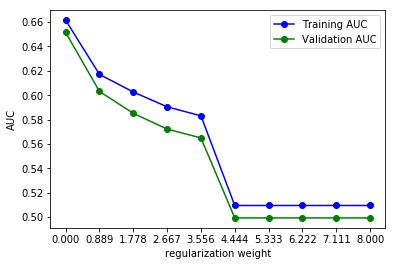

In [43]:
plt.plot(reg_value, training_auc, color = 'blue', label = 'Training AUC', marker = 'o')
plt.plot(reg_value, validation_auc, color = 'green', label = 'Validation AUC', marker = 'o')

plt.xticks(reg_value)
plt.xlabel('regularization weight')
plt.ylabel('AUC')

plt.legend()
plt.show()

## Q4

In [45]:
degree = 2
XtrP = ml.transforms.fpoly(Xt, degree, False)

print(XtrP.shape)

(5000, 119)


In [46]:
print('Number of features = ', XtrP.shape[1])

Number of features =  119


## Q5

In [59]:
XtrP,params = ml.transforms.rescale(XtrP)
XvaP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xva,degree,False), params)
print(XvaP.shape)

(40000, 119)


In [55]:
reg_value = np.linspace(0,8,10)

training_auc = np.zeros(10)
validation_auc = np.zeros(10)

for i, r in enumerate(reg_value):
    learner = ml.linearC.linearClassify()
    learner.train(XtrP, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100) 
    training_auc[i] = learner.auc(XtrP, Yt) # train AUC
    validation_auc[i] = learner.auc(XvaP, Yva)
    
print(training_auc)
print(validation_auc)

/Users/zhiyuanliu/Documents/Classes/CS 178/hw178/178HW4/mltools/base.py:96: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/Users/zhiyuanliu/Documents/Classes/CS 178/hw178/178HW4/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
/Users/zhiyuanliu/Documents/Classes/CS 178/hw178/178HW4/mltools/linearC.py:84: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob + 1.0       # logistic transform (binary classification; C=1)


[0.61734116 0.57458994 0.55444619 0.55201911 0.55666876 0.50953539
 0.50953539 0.50953539 0.50953539 0.50953539]
[0.54007041 0.49515319 0.47705685 0.4545484  0.44423999 0.49933836
 0.49933836 0.49933836 0.49933836 0.49933836]


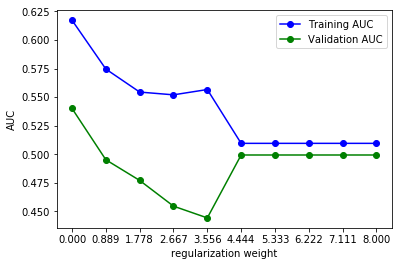

In [56]:
plt.plot(reg_value, training_auc, color = 'blue', label = 'Training AUC', marker = 'o')
plt.plot(reg_value, validation_auc, color = 'green', label = 'Validation AUC', marker = 'o')

plt.xticks(reg_value)
plt.xlabel('regularization weight')
plt.ylabel('AUC')

plt.legend()
plt.show()

# Problem 2: Nearest Neighbor

## Q1

In [61]:
K_num = np.array([1,2,3,5,8,13,21])
training_auc = np.zeros(7)
validation_auc = np.zeros(7)

learner = ml.knn.knnClassify()
for i, k in enumerate(K_num):
    learner.train(XtS, Yt, K=k, alpha=0.0)
    training_auc[i] = learner.auc(XtS, Yt) # train AUC
    validation_auc[i] = learner.auc(XvS, Yva)

print(training_auc)
print(validation_auc)

[0.99717752 0.9178101  0.86756235 0.82087064 0.78516166 0.75659512
 0.73135687]
[0.56998478 0.59581769 0.60664543 0.61946638 0.63150742 0.63960391
 0.64472525]


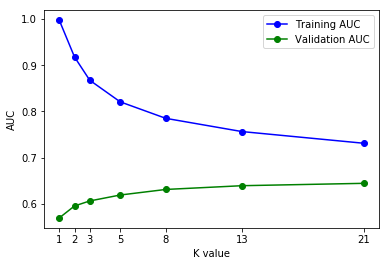

In [63]:
plt.plot(K_num, training_auc, color = 'blue', label = 'Training AUC', marker = 'o')
plt.plot(K_num, validation_auc, color = 'green', label = 'Validation AUC', marker = 'o')

plt.xticks(K_num)
plt.xlabel('K value')
plt.ylabel('AUC')

plt.legend()
plt.show()

## Q2

In [64]:
K_num = np.array([1,2,3,5,8,13,21])
training_auc = np.zeros(7)
validation_auc = np.zeros(7)

learner = ml.knn.knnClassify()
for i, k in enumerate(K_num):
    learner.train(Xt, Yt, K=k, alpha=0.0)
    training_auc[i] = learner.auc(Xt, Yt) # train AUC
    validation_auc[i] = learner.auc(Xva[:5000], Yva[:5000])

print(training_auc)
print(validation_auc)

[0.99704076 0.91211207 0.86035488 0.79513526 0.74566345 0.71339296
 0.69019381]
[0.55932082 0.5731827  0.57892934 0.57757238 0.58228176 0.58856514
 0.59681686]


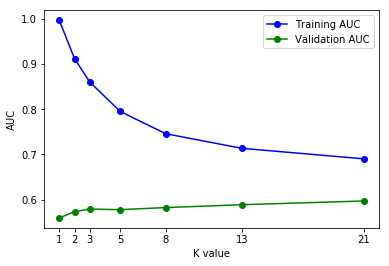

In [65]:
plt.plot(K_num, training_auc, color = 'blue', label = 'Training AUC', marker = 'o')
plt.plot(K_num, validation_auc, color = 'green', label = 'Validation AUC', marker = 'o')

plt.xticks(K_num)
plt.xlabel('K value')
plt.ylabel('AUC')

plt.legend()
plt.show()

## Q3

In [69]:
K = range(1,10,1) # Or something else 
A = range(0,5,1) # Or something else 

tr_auc = np.zeros((len(K),len(A))) 
va_auc = np.zeros((len(K),len(A))) 

learner = ml.knn.knnClassify()
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt) # train learner using k and a 
        va_auc[i][j] = learner.auc(XvS[:5000], Yva[:5000])
        
print(tr_auc)
print(va_auc)

[[0.99717752 0.99717752 0.99717752 0.99717752 0.99717752]
 [0.9178101  0.99998266 0.99998266 0.99998266 0.99998266]
 [0.86756235 0.9693971  0.9845296  0.99323004 0.9968849 ]
 [0.84047808 0.9472222  0.97464259 0.98944692 0.99528401]
 [0.82087064 0.93133676 0.96761947 0.98622514 0.99380377]
 [0.80532956 0.91786831 0.96143651 0.98322804 0.99249089]
 [0.79516003 0.90770196 0.95638952 0.98067907 0.99127815]
 [0.78516166 0.89935676 0.95200241 0.97857114 0.99032299]
 [0.77838728 0.89248101 0.94795338 0.97658617 0.98939614]]
[[0.57773161 0.57773161 0.57773161 0.57751119 0.57751119]
 [0.60751944 0.60960162 0.60961928 0.60936746 0.60936826]
 [0.62280795 0.62381362 0.62358053 0.6225836  0.62164536]
 [0.62911594 0.63138446 0.62991493 0.62785068 0.62638035]
 [0.63107653 0.63457516 0.63198061 0.62957462 0.62727345]
 [0.63934583 0.64017542 0.63625744 0.63253286 0.62948792]
 [0.64227223 0.64334882 0.63765151 0.63376645 0.6300879 ]
 [0.64323892 0.64476358 0.63860063 0.63443538 0.63050314]
 [0.64497882 

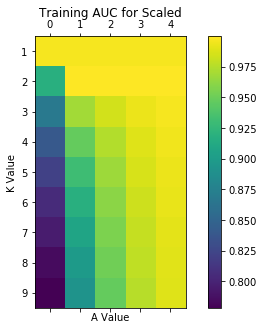

In [77]:
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+list(A)) 
ax.set_yticklabels(['']+list(K))
ax.set_title('Training AUC for Scaled')
ax.set_xlabel('A Value')
ax.set_ylabel('K Value')
plt.show()

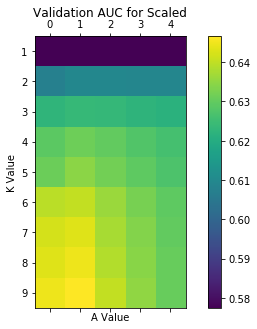

In [75]:
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+list(A)) 
ax.set_yticklabels(['']+list(K))
ax.set_title('Validation AUC for Scaled')
ax.set_xlabel('A Value')
ax.set_ylabel('K Value')
plt.show()

k = 9, a = 1

# Problem 3: Decision Trees

## Q1

In [81]:
max_depth = np.array(range(1,20,2))

training_auc = np.zeros(max_depth.shape[0])
validation_auc = np.zeros(max_depth.shape[0])

learner = ml.dtree.treeClassify()
for i, d in enumerate(max_depth):
    learner.train(XtS, Yt, maxDepth=d, minParent=2, minLeaf=1)
    training_auc[i] = learner.auc(XtS, Yt) # train AUC
    validation_auc[i] = learner.auc(XvS, Yva)

print(training_auc)
print(validation_auc)

[0.59802421 0.65497753 0.70465519 0.75494991 0.81603585 0.87513063
 0.92641218 0.95107768 0.96863956 0.98242034]
[0.60093708 0.6325335  0.63628392 0.63045846 0.61395721 0.60884357
 0.59644889 0.59372132 0.58965459 0.58608085]


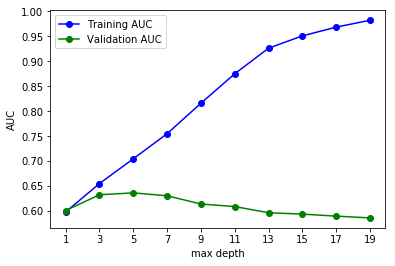

In [82]:
plt.plot(max_depth, training_auc, color = 'blue', label = 'Training AUC', marker = 'o')
plt.plot(max_depth, validation_auc, color = 'green', label = 'Validation AUC', marker = 'o')

plt.xticks(max_depth)
plt.xlabel('max depth')
plt.ylabel('AUC')

plt.legend()
plt.show()

## Q2

In [89]:
## Plot the number of nodes in the tree as maxDepth is varied:
max_depth = np.array(range(1,40,4))
node_num = np.zeros(maxd.shape[0])

learner = ml.dtree.treeClassify()
for i, d in enumerate(max_depth): 
    learner.train(XtS, Yt, maxDepth=d, minParent=2)
    node_num[i] = learner.sz

node_num1 = np.zeros(maxd.shape[0])

for i, d in enumerate(max_depth): 
    learner.train(XtS, Yt, maxDepth=d, minParent=5)
    node_num1[i] = learner.sz

print(node_num)
print(node_num1)

[3.000e+00 6.300e+01 6.350e+02 2.563e+03 5.115e+03 7.115e+03 8.245e+03
 9.073e+03 9.435e+03 9.739e+03]
[3.000e+00 6.300e+01 5.230e+02 1.709e+03 3.129e+03 3.867e+03 4.471e+03
 4.863e+03 5.035e+03 5.095e+03]


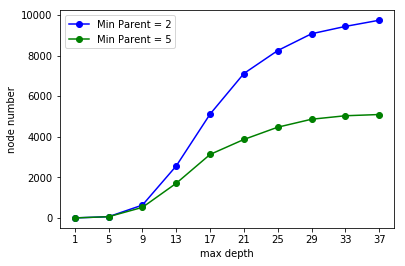

In [90]:
plt.plot(max_depth, node_num, color = 'blue', label = 'Min Parent = 2', marker = 'o')
plt.plot(max_depth, node_num1, color = 'green', label = 'Min Parent = 5', marker = 'o')

plt.xticks(max_depth)
plt.xlabel('max depth')
plt.ylabel('node number')

plt.legend()
plt.show()

## Q3

In [103]:
P = range(1,16,3) # Or something else 
L = range(1,11,2) # Or something else 

tr_auc = np.zeros((len(P),len(L))) 
va_auc = np.zeros((len(P),len(L))) 

learner = ml.dtree.treeClassify()
for i,p in enumerate(P):
    for j,l in enumerate(L):
        learner.train(XtS, Yt, maxDepth=10, minParent=p, minLeaf=l)
        tr_auc[i][j] = learner.auc(XtS, Yt) # train learner using k and a 
        va_auc[i][j] = learner.auc(XvS[:5000], Yva[:5000])
        
print(tr_auc)
print(va_auc)

[[0.85099004 0.84650165 0.83969453 0.83198277 0.83195358]
 [0.85222622 0.84668988 0.84112072 0.83074774 0.83194527]
 [0.84610155 0.8442774  0.84028251 0.83197464 0.83195199]
 [0.8436406  0.84100449 0.84020192 0.83109838 0.83194792]
 [0.83830063 0.83630699 0.83573529 0.83084424 0.83195871]]
[[0.6223283  0.61911708 0.62102201 0.62442011 0.61879435]
 [0.62000902 0.61753533 0.61994052 0.6248333  0.61906713]
 [0.62266406 0.6234866  0.62012945 0.62439398 0.61893734]
 [0.62234525 0.62083638 0.62246434 0.62482741 0.61987335]
 [0.62707471 0.62513454 0.62069803 0.62449469 0.61927899]]


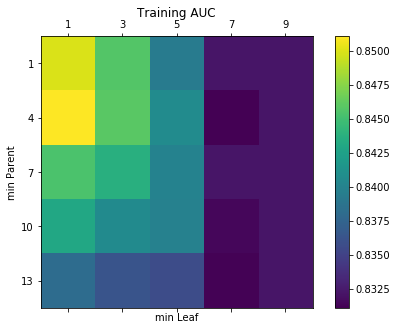

In [106]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(L))
ax.set_yticklabels(['']+list(P))
ax.set_xlabel('min Leaf')
ax.set_ylabel('min Parent')
ax.set_title('Training AUC')

plt.show()


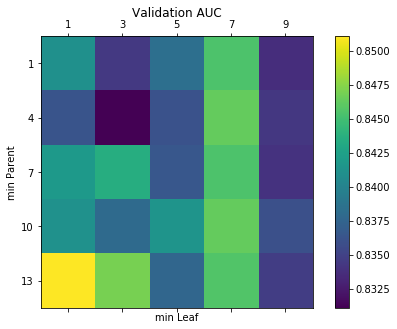

In [107]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(L))
ax.set_yticklabels(['']+list(P))
ax.set_xlabel('min Leaf')
ax.set_ylabel('min Parent')
ax.set_title('Validation AUC')

plt.show()

min parent = 13, min leaf = 1

# Problem 4: Neural Networks and Conclusion

## Q1

In [108]:
L = range(1,5,1) # Or something else 
N = range(2,6,1) # Or something else 

tr_auc = np.zeros((len(L),len(N))) 
va_auc = np.zeros((len(L),len(N))) 

nn = ml.nnet.nnetClassify()
for i,l in enumerate(L):
    for j,n in enumerate(N):
        nn.init_weights([XtS.shape[1], l*n, 2], 'random', XtS, Yt) # as many layers nodes you want    
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt) # train learner using k and a 
        va_auc[i][j] = nn.auc(XvS[:5000], Yva[:5000])
        
print(tr_auc)
print(va_auc)

it 1 : Jsur = 0.4321604749706381, J01 = 0.3454
it 2 : Jsur = 0.42612752933713643, J01 = 0.3454
it 4 : Jsur = 0.42592009333627046, J01 = 0.3296
it 8 : Jsur = 0.4263831239356833, J01 = 0.3368
it 16 : Jsur = 0.4267765674944996, J01 = 0.338
it 32 : Jsur = 0.4273177167834803, J01 = 0.3454
it 64 : Jsur = 0.42775216846794284, J01 = 0.3454
it 128 : Jsur = 0.42820687644452726, J01 = 0.3454
it 256 : Jsur = 0.42852511530903203, J01 = 0.3454
it 1 : Jsur = 0.4307475631414062, J01 = 0.3454
it 2 : Jsur = 0.42430830054724983, J01 = 0.3454
it 4 : Jsur = 0.4219517541867341, J01 = 0.322
it 8 : Jsur = 0.4223957821420998, J01 = 0.3244
it 16 : Jsur = 0.42292342977437947, J01 = 0.3264
it 32 : Jsur = 0.42320276924057926, J01 = 0.3262
it 64 : Jsur = 0.4237229929132943, J01 = 0.3266
it 128 : Jsur = 0.4243747440654962, J01 = 0.3284
it 256 : Jsur = 0.42501063864346017, J01 = 0.33
it 1 : Jsur = 0.43013860525847786, J01 = 0.3454
it 2 : Jsur = 0.42272367750468565, J01 = 0.3454
it 4 : Jsur = 0.41903620452733115, J01 

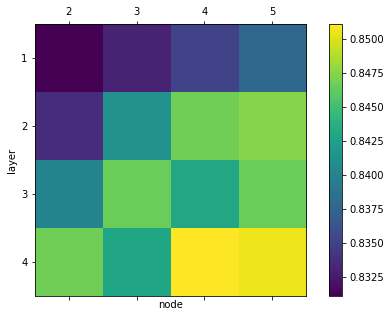

In [111]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(N))
ax.set_yticklabels(['']+list(L))
ax.set_xlabel('node')
ax.set_ylabel('layer')

plt.show()

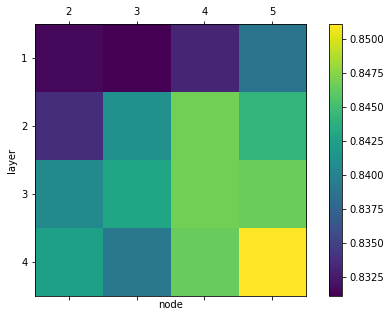

In [113]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(N))
ax.set_yticklabels(['']+list(L))
ax.set_xlabel('node')
ax.set_ylabel('layer')

plt.show()

node = 4, layer = 2

## Q2

I did this homework alone.